## Project Name: Breast Cancer
## Writers: Yulong Chen and Lu Shang
## Source: 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data or https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
## Select Reason: We need a binary response variable data with multi predictors.
## Data Description:
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Programx64\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Overview

In [2]:
df= pd.read_csv('data.csv',header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
#drop na column
nans = []
for i in df.columns:
    if float(df[i].isnull().sum()) > df.shape[0]-10:
        nans.append(i)
df.drop(nans, axis = 1, inplace=True)
df.shape

(569, 32)

In [5]:
#drop high frequency column
lev_counts = []
if df.select_dtypes(include = ['int64']).columns.tolist() != []:
    for i in df.select_dtypes(include = ['int64']).columns:
        if len((df[i].value_counts().tolist())) > df.shape[0]-10:
            lev_counts.append(i)
df.drop(lev_counts, axis = 1, inplace = True)
df.shape

(569, 31)

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

y1 = df.loc[df['diagnosis'] == 1, 'radius_mean'].tolist()
y0 = df.loc[df['diagnosis'] == 0, 'radius_mean'].tolist()

class1 = go.Box(
    y=y1, boxpoints='all'
)
class0 = go.Box(
    y=y0, boxpoints='all'
)

data = [class1, class0]
py.iplot(data)

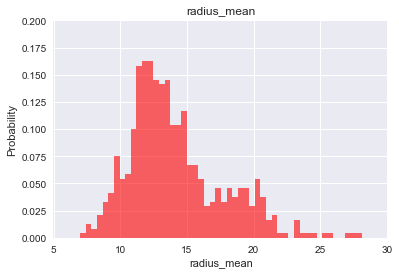

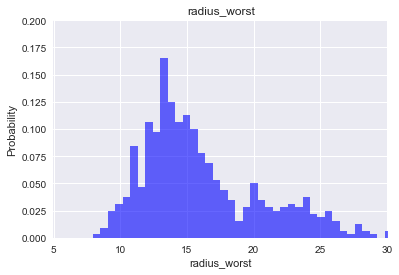

In [9]:
#histogram on radius_mean and radius_worst
n, bins, patches =plt.hist(df['radius_mean'], 50, normed=1, facecolor='r', alpha=0.6)
plt.xlabel('radius_mean')
plt.ylabel('Probability')
plt.title('radius_mean')
plt.axis([df.radius_mean.min()-2, df.radius_mean.max()+2, 0, 0.2])
plt.grid(True)
plt.show()
n, bins, patches =plt.hist(df['radius_worst'], 50, normed=1, facecolor='b', alpha=0.6)
plt.xlabel('radius_worst')
plt.ylabel('Probability')
plt.title('radius_worst')
plt.axis([df.radius_mean.min()-2, df.radius_mean.max()+2, 0, 0.2])
plt.grid(True)
plt.show()
#we see more outlier in radius worst

In [10]:
df.describe()
df.describe().iloc[2]
#Because the standard deviations are not in the same scale, we realised we need to normalise the data.

diagnosis                    0.483918
radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_

# Variable selection

#### Take a look at the correlation matrix of all variables to get a general sense. 

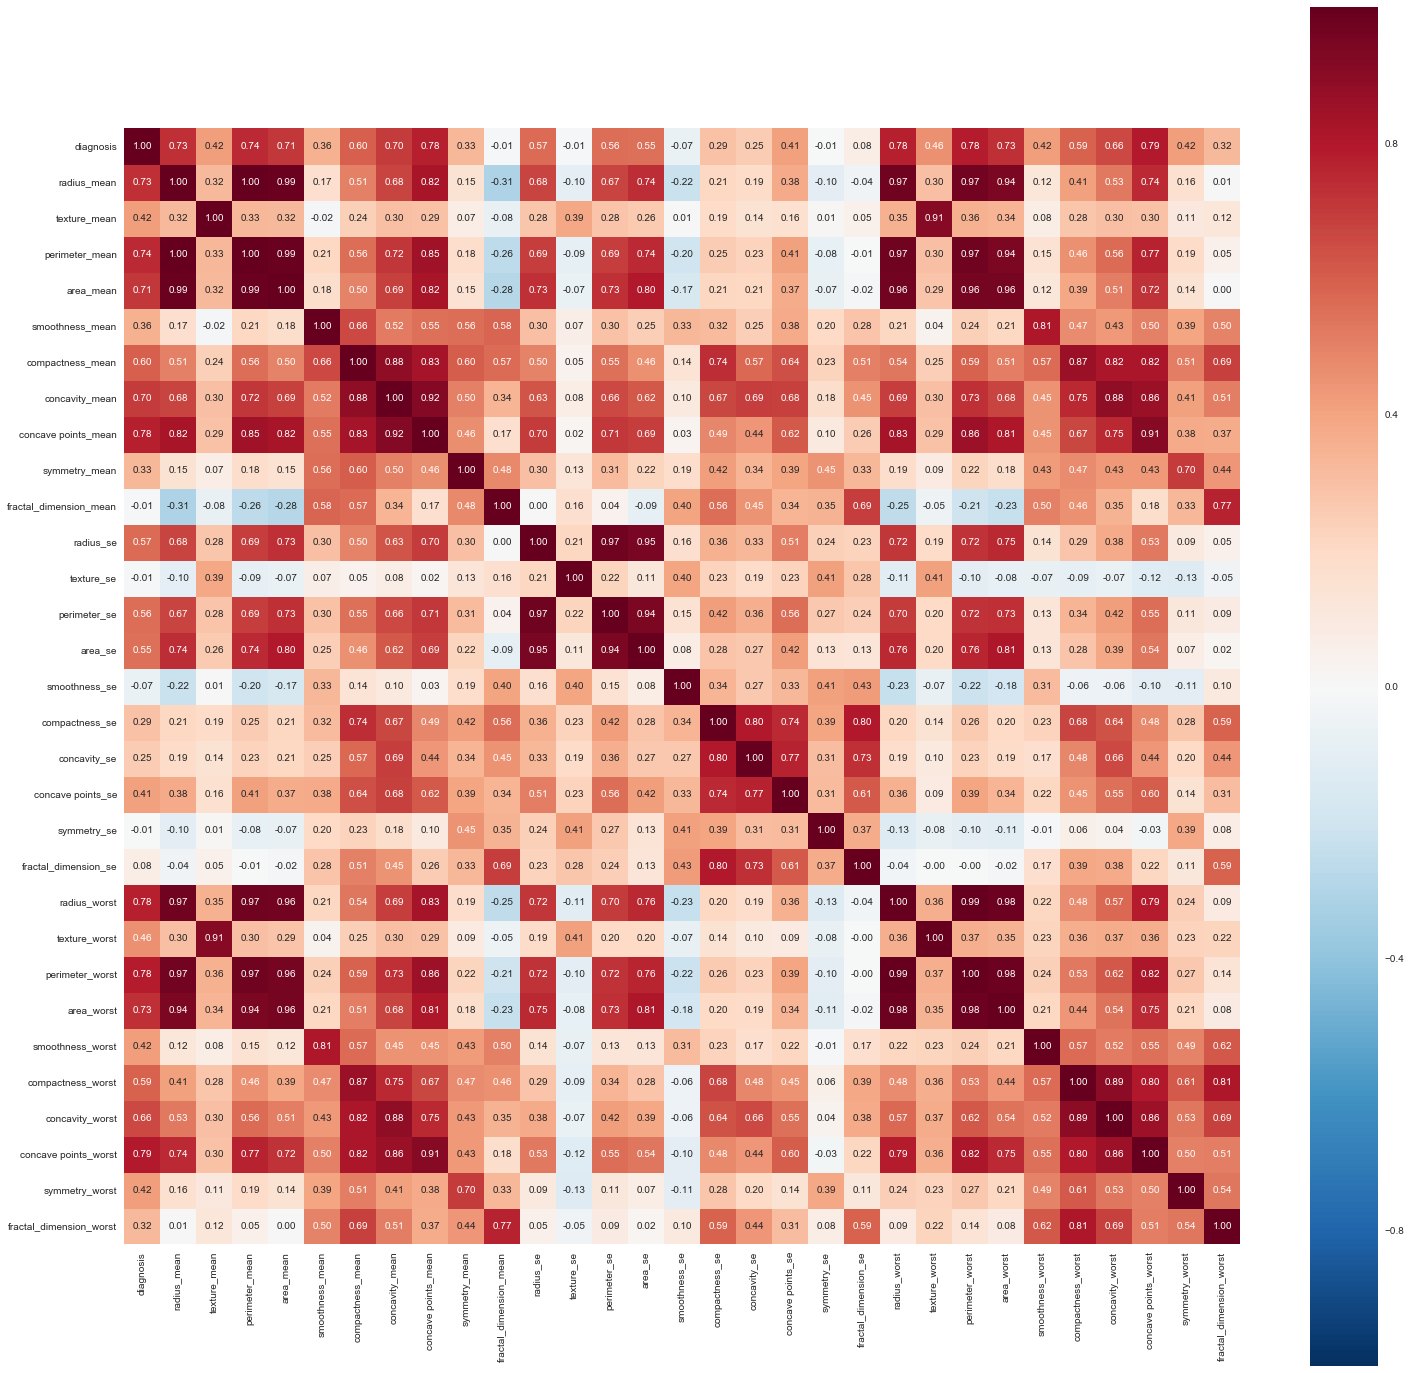

In [55]:
#df.corr().plot(kind='hist')
corr=df.corr()
corr = (corr)
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Then, rank the correlations between the outcome and each variable from top down. 

In [12]:
df.corr()['diagnosis'].sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

#### From the correlation ranking above, we can see that the th "worst" variables are more correlated with the outcome, so we'll select use these variables in our model. 

# Multicollinearity 

#### 1.Correlation
#### 2.Correlation of normalized data
#### 3. VIF Score

## 1.Correlation

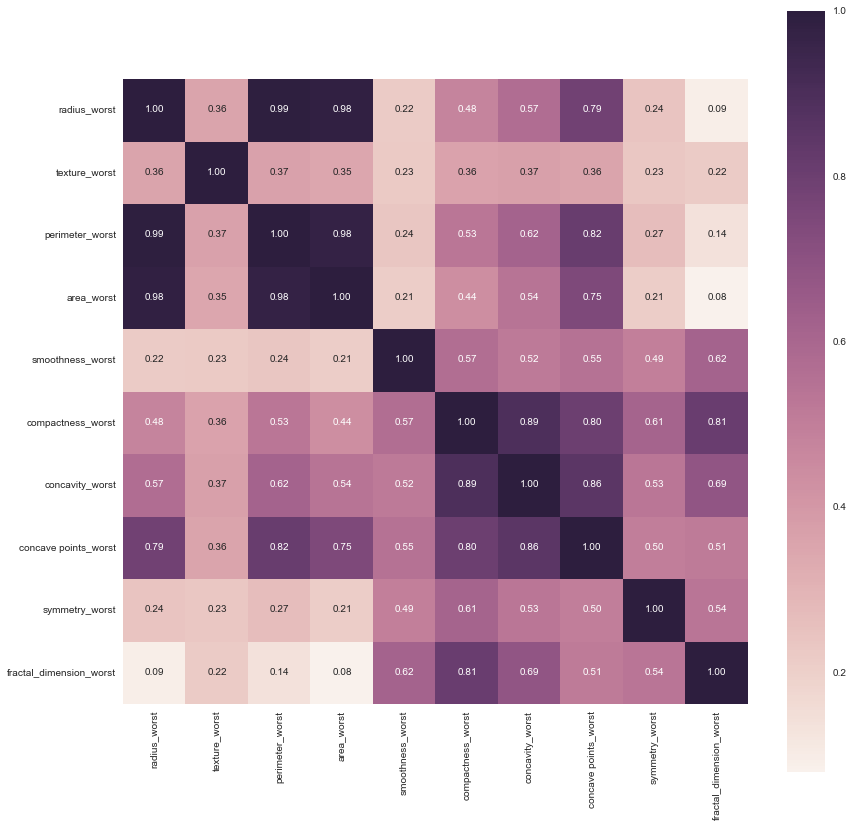

In [13]:
#df.corr().plot(kind='hist')
corr=df.iloc[:,21:32].corr()
corr = (corr)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


#### We can see that radius, prtimeter and area are strongly correlated. Also, compactness, concavity and convave points are strongly correalted. In order to reduce the multicollinearity effect, we'll choose either on of them.  

In [14]:
corr

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000


#### Pairwise relationship 

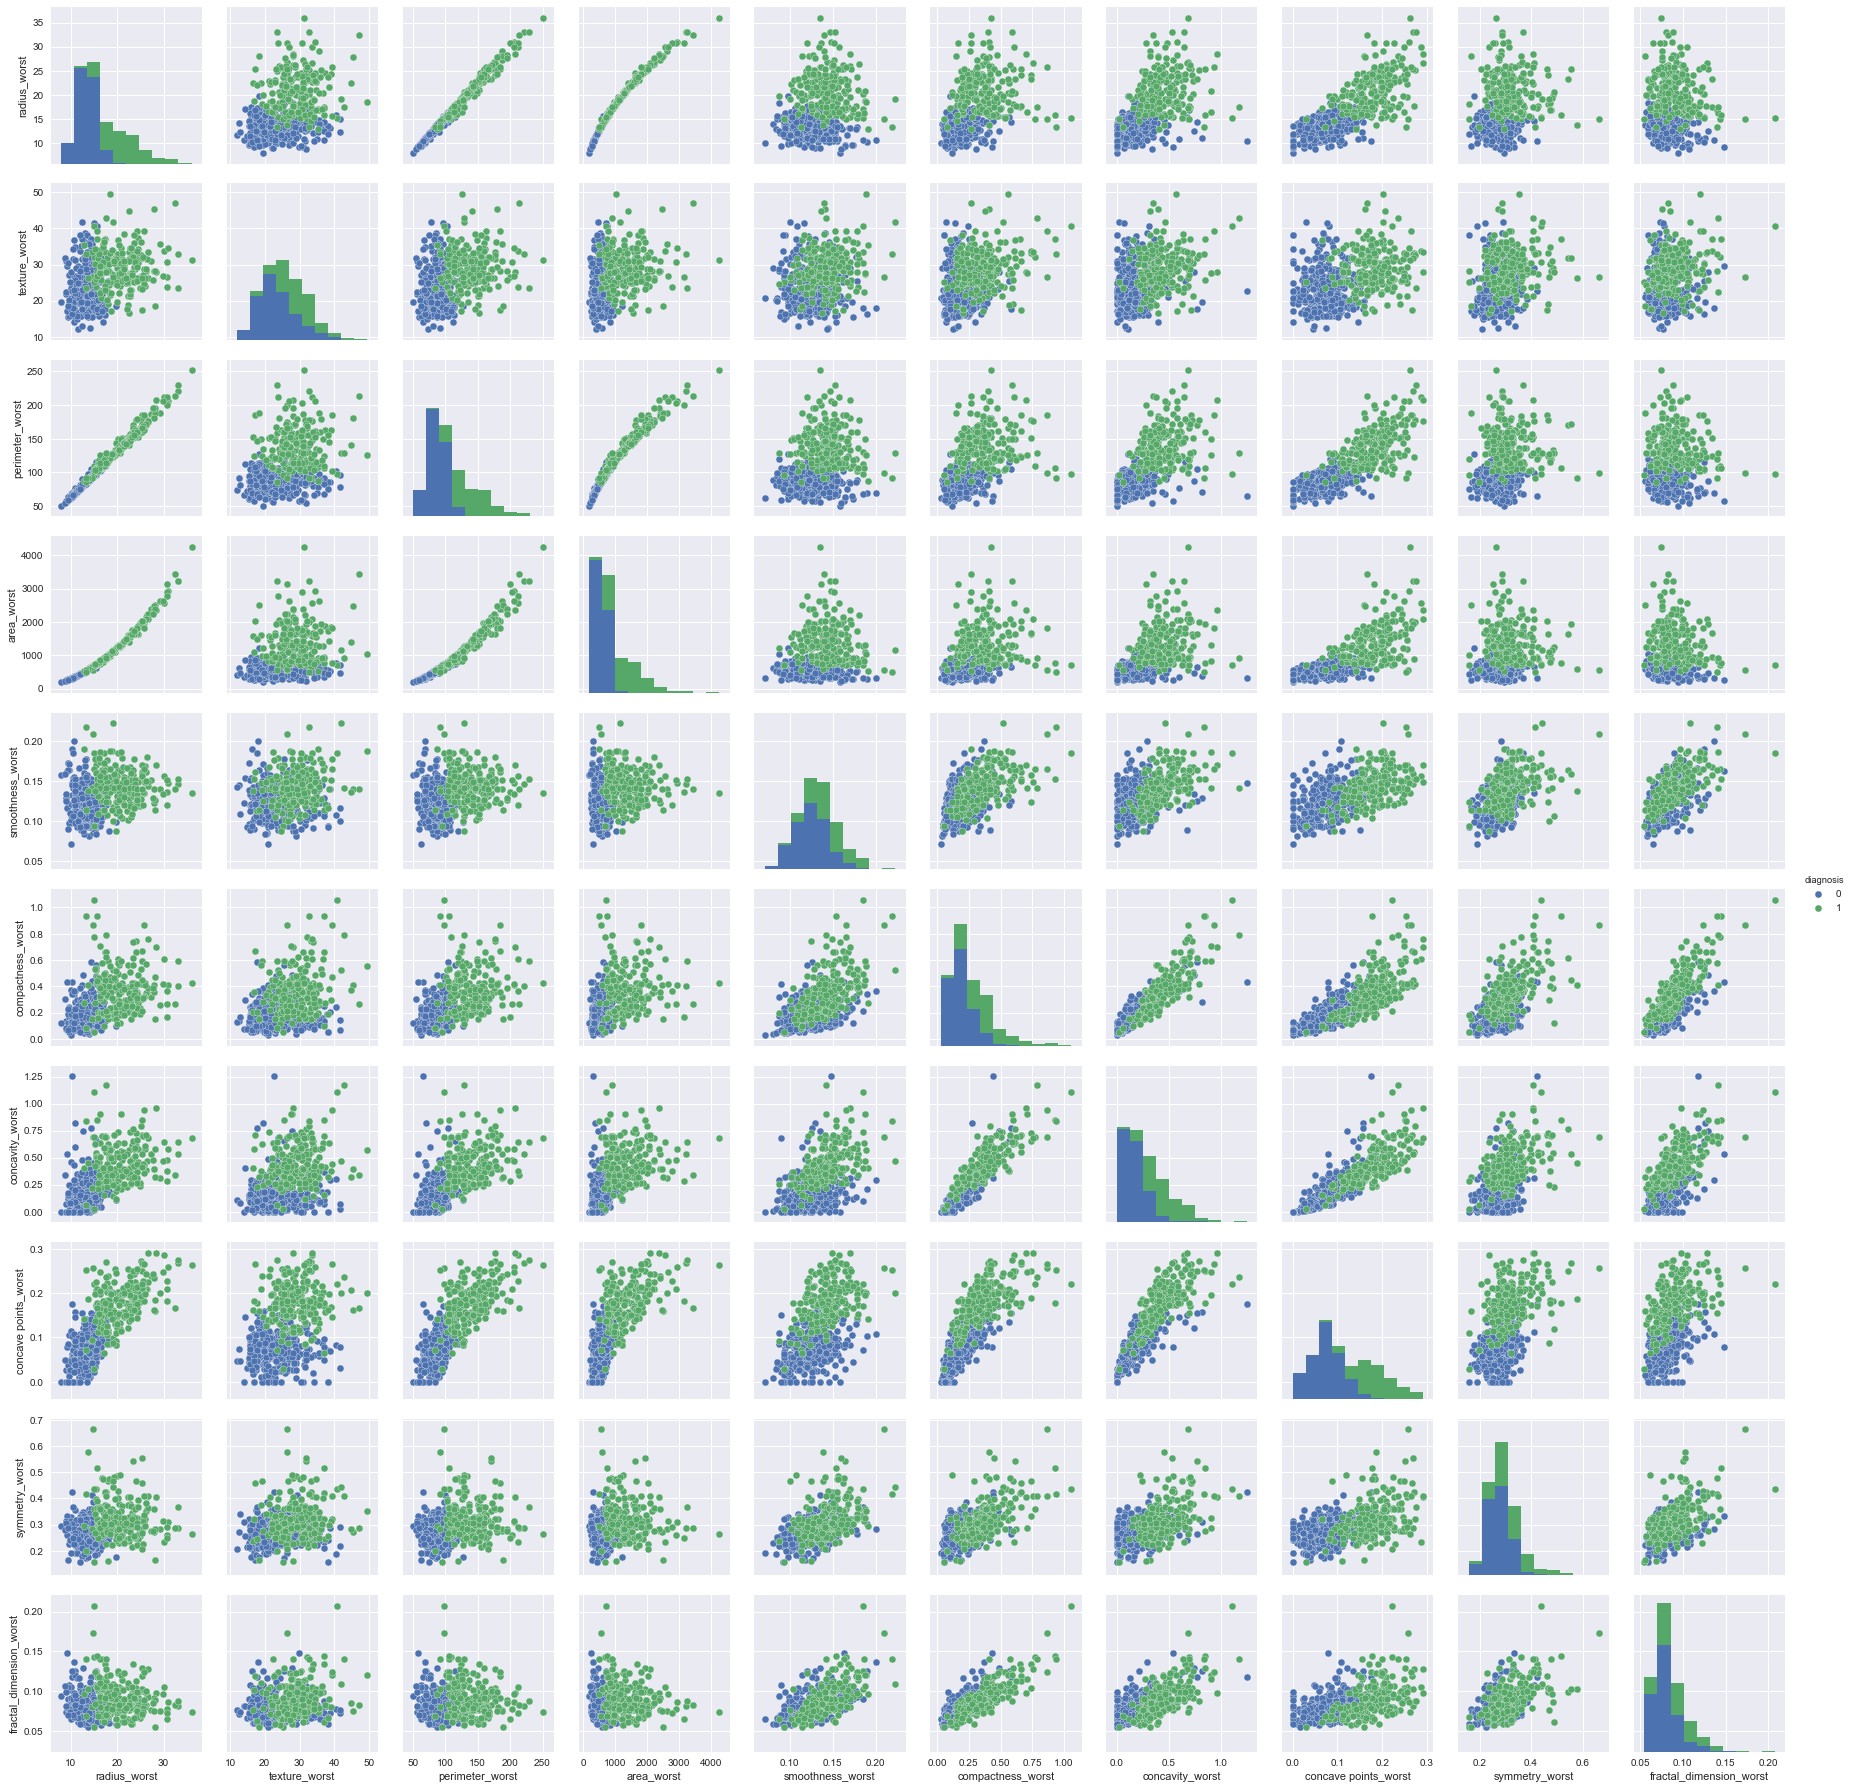

In [15]:
plt.figure(figsize=(20,20))
sns.pairplot(df, vars = df.iloc[:,21:32],hue='diagnosis')

### Normalize the data

In [16]:
y=df['diagnosis']
# y
df_x_b =df.drop(['diagnosis'],axis=1)
df_x_b.shape
df_x_norm = (df_x_b-df_x_b.mean(axis=0))/(df_x_b.max(axis=0)-df_x_b.min(axis=0))
df_x_norm.describe().iloc[2].sort_values()
# df_x_norm
#after normalization, the standard deviation seems in the rational range, 
#still some little variation value in the first four variables

concavity_se               0.076227
area_se                    0.084967
fractal_dimension_se       0.091417
perimeter_se               0.095267
radius_se                  0.100421
smoothness_se              0.102067
symmetry_se                0.116316
concave points_se          0.116884
fractal_dimension_worst    0.118466
texture_se                 0.121917
symmetry_worst             0.121954
smoothness_mean            0.126967
compactness_se             0.134498
symmetry_mean              0.138456
area_worst                 0.139932
texture_mean               0.145453
fractal_dimension_mean     0.148702
area_mean                  0.149274
smoothness_worst           0.150779
compactness_worst          0.152649
compactness_mean           0.161992
texture_worst              0.163813
concavity_worst            0.166633
radius_mean                0.166787
perimeter_worst            0.167352
perimeter_mean             0.167915
radius_worst               0.171940
concavity_mean             0

### Correlation using normalized data

In [17]:
#combine normalized data
df_norm = pd.concat([y,df_x_norm], axis = 1)
df_norm.shape

(569, 31)

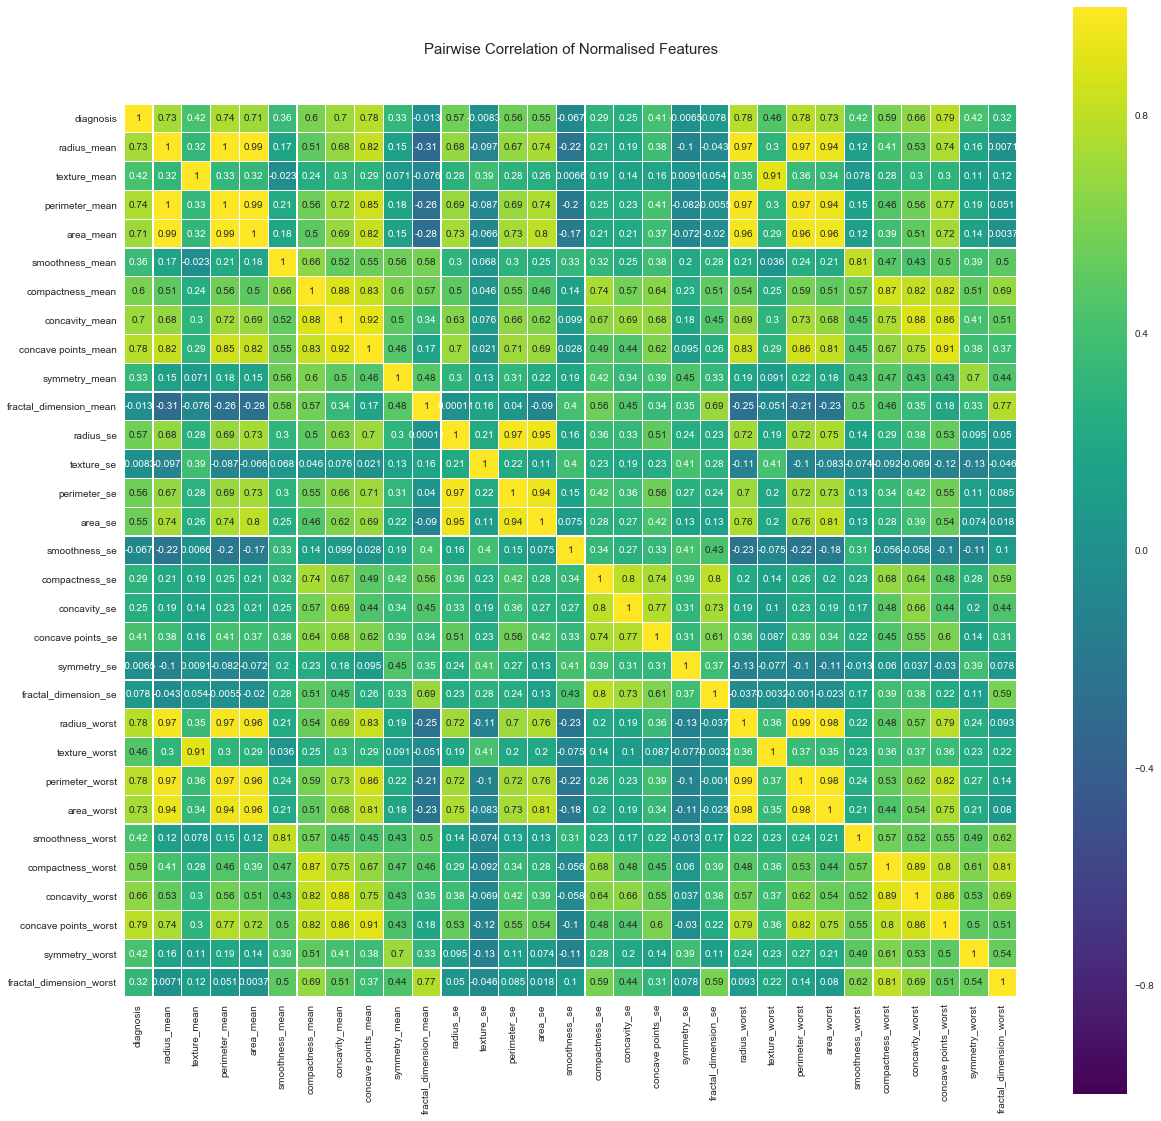

In [40]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pairwise Correlation of Normalised Features', y=1.05, size=15)
sns.heatmap(df_norm.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [19]:
df_norm.corr()['diagnosis'].sort_values(ascending=False)
#seems like the last four features have very low correlation with our label
# fractal_dimension_se       0.077972
# symmetry_se               -0.006522
# texture_se                -0.008303
# fractal_dimension_mean    -0.012838
# smoothness_se             -0.067016

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=df_x_norm.columns
vif['Vif Factor']=[variance_inflation_factor(df_x_norm.values,i) for i in range(df_x_norm.shape[1])]
sort_vif=vif.sort_values(by=['Vif Factor'],ascending=False)
sort_vif

,Features,Vif Factor
0,radius_mean,3806.115296
2,perimeter_mean,3786.400419
20,radius_worst,799.105946
22,perimeter_worst,405.023336
3,area_mean,347.878657
23,area_worst,337.221924
10,radius_se,75.462027
6,concavity_mean,70.767720
12,perimeter_se,70.359695
7,concave points_mean,60.041733


In [21]:
drop_list1=sort_vif['Features'].tolist()[0:15]
drop_list1
#we wanna drop high VIF score columns in the original dataframe

['radius_mean',
 'perimeter_mean',
 'radius_worst',
 'perimeter_worst',
 'area_mean',
 'area_worst',
 'radius_se',
 'concavity_mean',
 'perimeter_se',
 'concave points_mean',
 'compactness_mean',
 'area_se',
 'compactness_worst',
 'concave points_worst',
 'concavity_worst']

In [22]:
df_drop = df.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
df_drop.head()

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.4601,0.11890
1,1,17.77,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.1238,0.2750,0.08902
2,1,21.25,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.1444,0.3613,0.08758
3,1,20.38,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.2098,0.6638,0.17300
4,1,14.34,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.1374,0.2364,0.07678


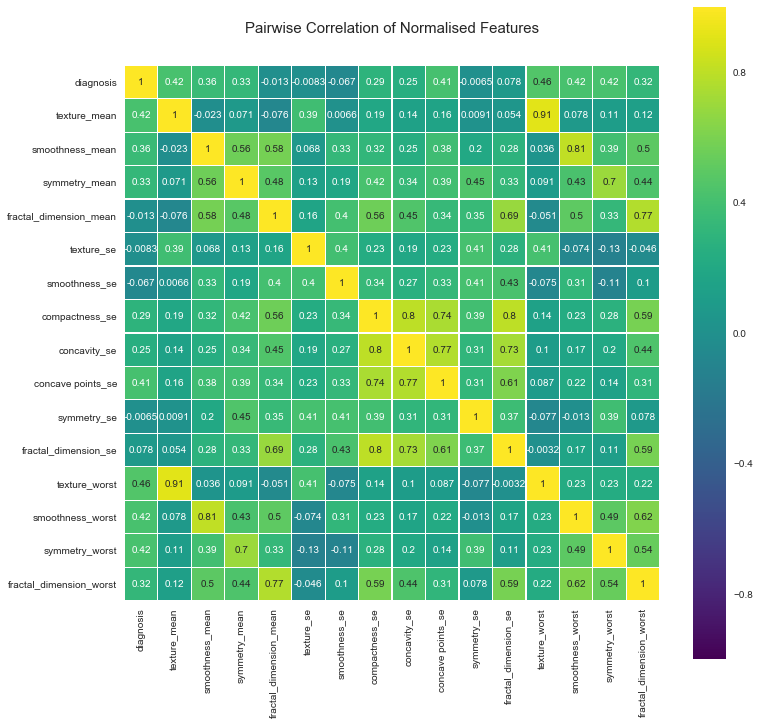

In [23]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pairwise Correlation of Normalised Features', y=1.05, size=15)
sns.heatmap(df_drop.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
#we can see the correlation is not very high with each other

In [24]:
df_drop=df_drop.drop('texture_se',axis=1)

In [25]:
df_drop_x=df_drop.drop('diagnosis',axis=1)

# Model Building
# Logistic Regression

In [41]:
def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    #prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    #comparison for same data
    #Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=7)
    # About cross validitaion please follow this link
    #https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    #let me explain a little bit data.shape[0] means number of rows in data
    #n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [42]:
model=LogisticRegression()
prediction_var = ['radius_mean','compactness_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
outcome_var= "diagnosis"
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 89.455%
Cross-Validation Score : 69.512%
Cross-Validation Score : 78.659%
Cross-Validation Score : 81.246%
Cross-Validation Score : 85.317%
Cross-Validation Score : 87.019%
Cross-Validation Score : 88.154%
Cross-Validation Score : 88.611%


In [43]:
model=LogisticRegression()
prediction_var = ['concave points_worst','perimeter_worst','radius_worst','area_worst','compactness_worst']
outcome_var= "diagnosis"
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 92.794%
Cross-Validation Score : 84.146%
Cross-Validation Score : 86.585%
Cross-Validation Score : 88.588%
Cross-Validation Score : 90.824%
Cross-Validation Score : 91.424%
Cross-Validation Score : 91.619%
Cross-Validation Score : 91.934%


# Decision Tree

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
train, test = train_test_split(df_drop, test_size = 0.3)
classifier = tree.DecisionTreeClassifier(max_depth = 3)
classifier.fit(train.loc[:, ~(train.columns == 'diagnosis')], train['diagnosis'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
pred_train = classifier.predict(train.loc[:, ~(train.columns == 'diagnosis')])
pred_test = classifier.predict(test.loc[:, ~(test.columns == 'diagnosis')])
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(pred_train, train['diagnosis'])
ac_test = accuracy_score(pred_test, test['diagnosis'])
print('accuracy of the training data set is {tr}, and the accuracy rate of the testing data set is {te}').format(tr=ac_train,te=ac_test)

accuracy of the training data set is 0.854271356784, and the accuracy rate of the testing data set is 0.801169590643


In [46]:
df_drop.columns.tolist()

['diagnosis',
 'texture_mean',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'texture_worst',
 'smoothness_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [47]:
df_drop_x=df_drop.drop('diagnosis',axis=1)

In [48]:
model = tree.DecisionTreeClassifier(max_depth = 3)
prediction_var = df_drop_x.columns.tolist()
outcome_var= "diagnosis"
classification_model(model,df_drop,prediction_var,outcome_var)

Accuracy : 86.292%
Cross-Validation Score : 76.829%
Cross-Validation Score : 79.268%
Cross-Validation Score : 77.537%
Cross-Validation Score : 79.758%
Cross-Validation Score : 81.337%
Cross-Validation Score : 80.332%
Cross-Validation Score : 79.791%


# Try Random Forest

('Accuracy is: ', 0.88304093567251463)


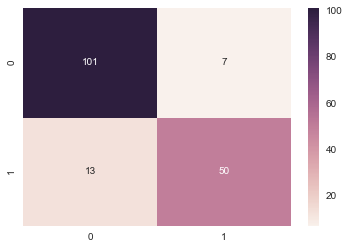

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(df_drop_x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is over 88% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other feature selection methods to find better results.
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.
Wechoose k = 5 and find best 5 features. Then we compare the accuracy.

Therefore we wanna try just keep"texture_worst, texture_mean, symmetry_worst, concavity_se, compactness_se".

In [50]:
from graphviz import Source

In [51]:
from IPython.display import SVG

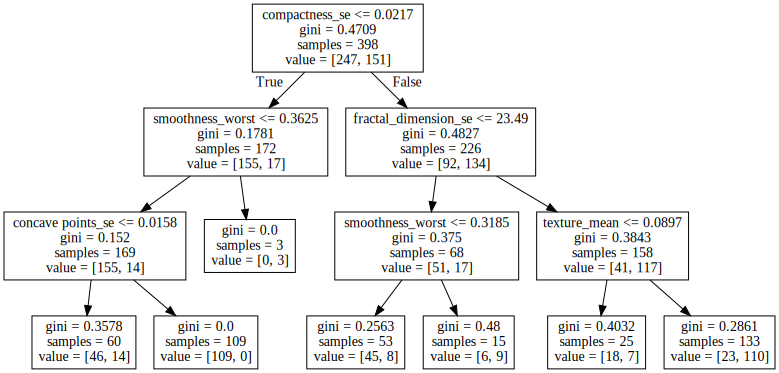

In [52]:
Source(tree.export_graphviz(classifier, out_file=None, feature_names = train.loc[:, ~(train.columns == 'Class')].columns))

In [53]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_curve, auc

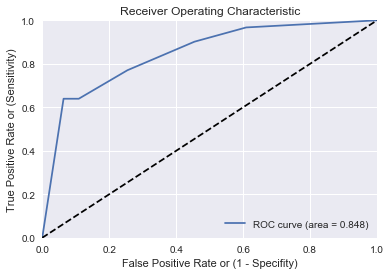

In [54]:
y_score = classifier.predict_proba(test.loc[:, ~(test.columns == 'diagnosis')])
y_true = np.asarray(test['diagnosis'])
y_score = y_score[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr, reorder = True)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()